## - Scrapping the votes intention

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import warnings
warnings.filterwarnings('ignore')

In [19]:

#get the webpage source 
options  = webdriver.ChromeOptions()
driver = webdriver.Chrome(executable_path='C:\\Users\\saadc\\.wdm\\drivers\\chromedriver\\win32\\95.0.4638.54\\chromedriver.exe',options=options)
driver.set_window_size(1120,1000)
driver.get('https://www.realclearpolitics.com/epolls/2012/president/us/general_election_romney_vs_obama-1171.html#')

# Wait for the page to fully load
driver.implicitly_wait(5)

# Step 2: Parse HTML code and grab tables with Beautiful Soup
soup = BeautifulSoup(driver.page_source, 'lxml')

tables = soup.find_all('table')

# Step 3: Read tables with Pandas read_html()
df_table_2012 = pd.read_html(str(tables))


driver.close()

In [32]:
df_table_2012[3].head()

,Poll,Date,Sample,MoE,Obama (D),Romney (R),Spread
0,Final Results,--,--,--,51.1,47.2,Obama +3.9
1,RCP Average,10/31 - 11/5,--,--,48.8,48.1,Obama +0.7
2,Politico/GWU/BattlegroundPolitico/GWU/Battlegr...,11/4 - 11/5,1000 LV,3.1,47.0,47.0,Tie
3,Rasmussen ReportsRasmussen Reports,11/3 - 11/5,1500 LV,3.0,48.0,49.0,Romney +1
4,IBD/TIPPIBD/TIPP,11/3 - 11/5,712 LV,3.7,50.0,49.0,Obama +1


In [33]:
#save the votes in a csv file : 
df_table_2012[3].to_csv("polls_2012.csv")

In [2]:
#read the csv files of the scrapped votes in 2012, 2016 and 2020
import pandas as pd

df_tab_2016 = pd.read_csv("polls_2016.csv")
df_tab_2020  = pd.read_csv("polls_2020.csv")
df_tab_2012  = pd.read_csv("polls_2012.csv")

## Polls : 2012 

### 1. Data cleaning and pre-processing

In [3]:
#seperate the year 2016 and 2015:
df_tab_2012[df_tab_2012["Date"]=='12/27 - 12/28'] # search for the index : 204
temp1 = df_tab_2012.iloc[:204]
temp1['Date']='2012/'+temp1["Date"]
temp2 = df_tab_2012.iloc[204:]
temp2['Date']='2011/'+temp2["Date"]
df_tab_2012 = pd.concat([temp1,temp2])
df_tab_2012

,Unnamed: 0,Poll,Date,Sample,MoE,Obama (D),Romney (R),Spread
0,0,Final Results,2012/--,--,--,51.1,47.2,Obama +3.9
1,1,RCP Average,2012/10/31 - 11/5,--,--,48.8,48.1,Obama +0.7
2,2,Politico/GWU/BattlegroundPolitico/GWU/Battlegr...,2012/11/4 - 11/5,1000 LV,3.1,47.0,47.0,Tie
3,3,Rasmussen ReportsRasmussen Reports,2012/11/3 - 11/5,1500 LV,3.0,48.0,49.0,Romney +1
4,4,IBD/TIPPIBD/TIPP,2012/11/3 - 11/5,712 LV,3.7,50.0,49.0,Obama +1
...,...,...,...,...,...,...,...,...
323,323,Rasmussen ReportsRasmussen Reports,2011/7/16 - 7/17,1000 LV,3.0,45.0,45.0,Tie
324,324,PPP (D)PPP (D),2011/7/15 - 7/16,577 RV,4.1,49.0,40.0,Obama +9
325,325,PPP (D)PPP (D),2011/6/12 - 6/16,638 RV,3.9,48.0,40.0,Obama +8
326,326,PPP (D)PPP (D),2011/5/14 - 5/18,1000 RV,3.1,53.0,35.0,Obama +18


In [4]:
#get the first date of each vote
df_tab_2012["Date"] = (df_tab_2012["Date"].str.split("-")).str[0]

In [5]:
df_tab_2012 = df_tab_2012.iloc[1:]
df_tab_2012

,Unnamed: 0,Poll,Date,Sample,MoE,Obama (D),Romney (R),Spread
1,1,RCP Average,2012/10/31,--,--,48.8,48.1,Obama +0.7
2,2,Politico/GWU/BattlegroundPolitico/GWU/Battlegr...,2012/11/4,1000 LV,3.1,47.0,47.0,Tie
3,3,Rasmussen ReportsRasmussen Reports,2012/11/3,1500 LV,3.0,48.0,49.0,Romney +1
4,4,IBD/TIPPIBD/TIPP,2012/11/3,712 LV,3.7,50.0,49.0,Obama +1
5,5,CNN/Opinion ResearchCNN/Opinion Research,2012/11/2,693 LV,3.5,49.0,49.0,Tie
...,...,...,...,...,...,...,...,...
323,323,Rasmussen ReportsRasmussen Reports,2011/7/16,1000 LV,3.0,45.0,45.0,Tie
324,324,PPP (D)PPP (D),2011/7/15,577 RV,4.1,49.0,40.0,Obama +9
325,325,PPP (D)PPP (D),2011/6/12,638 RV,3.9,48.0,40.0,Obama +8
326,326,PPP (D)PPP (D),2011/5/14,1000 RV,3.1,53.0,35.0,Obama +18


### 2. Aggregating the votes monthly 

In [6]:
#aggregation by month : 
df_tab_2012["Date"] = (df_tab_2012["Date"].str.split("/")).str[0] +'/'+ (df_tab_2012["Date"].str.split("/")).str[1]
temp_df = df_tab_2012.groupby(['Date']).mean()
temp_df   = temp_df.drop(['Unnamed: 0'],axis=1)
temp_df["date"]  = temp_df.index
temp_df["date"]  = pd.to_datetime(temp_df.date)
temp_df = temp_df.sort_values("date").reset_index(drop=True)

### 3. Data visualization 

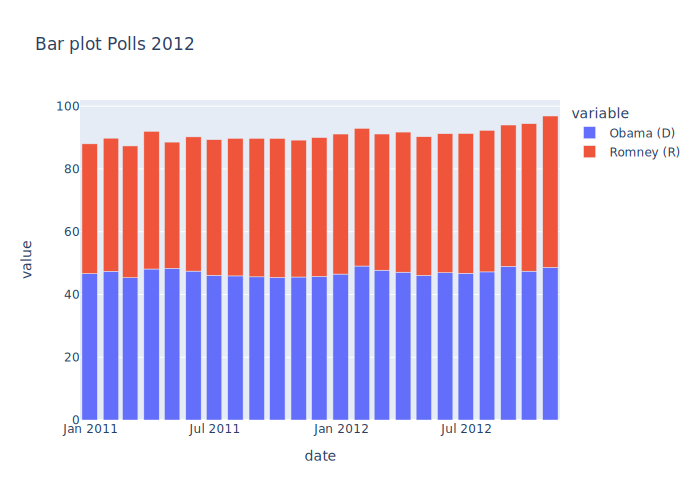

In [7]:
import plotly.express as px
import seaborn as sns 
import plotly.io as pio
pio.renderers.default = "browser"

#sns.lineplot(data=temp_df,x='date',y='Obama (D)')
fig = px.bar(temp_df, x="date", y=temp_df.columns[:2],title='Bar plot Polls 2012')
#fig.add_scatter(x=df_tab_2016['Date'], y=df_tab_2016['Trump (R)'], mode='lines')
fig.show(renderer="svg")

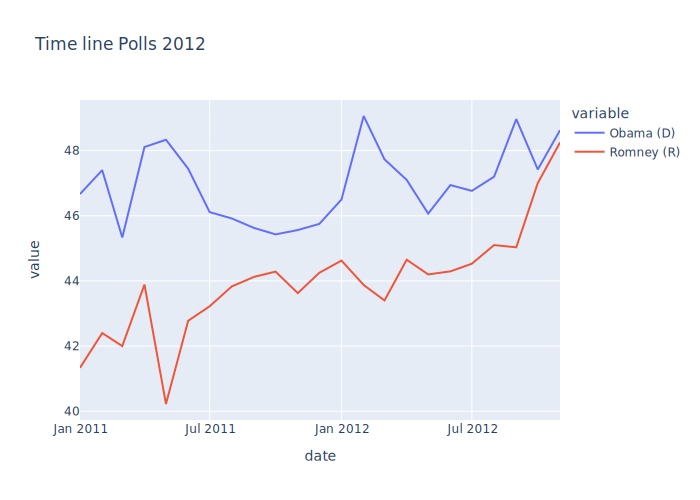

In [8]:

fig = px.line(temp_df, x="date", y=temp_df.columns[:2],title='Time line Polls 2012')
#fig.add_scatter(x=df_tab_2016['Date'], y=df_tab_2016['Trump (R)'], mode='lines')
fig.show(renderer="svg")



## Polls : 2016 

### 1. Data cleaning and pre-processing 

In [9]:
#seperate the year 2016 and 2015:
#df_tab_2012["Date"] = (df_tab_2016["Date"].str.split("/")).str[0] +'/'+ (df_tab_2016["Date"].str.split("/")).str[1]
df_tab_2016[df_tab_2016["Date"]=='12/22 - 12/23'] #index : 223
temp1 = df_tab_2016.iloc[:223]
temp1['Date']='2016/'+temp1["Date"]
temp2 = df_tab_2016.iloc[223:]
temp2['Date']='2015/'+temp2["Date"]
df_tab_2016 = pd.concat([temp1,temp2])
df_tab_2016

,Unnamed: 0,Poll,Date,Sample,MoE,Clinton (D),Trump (R),Spread
0,0,Final Results,2016/--,--,--,48.2,46.1,Clinton +2.1
1,1,RCP Average,2016/11/1 - 11/7,--,--,46.8,43.6,Clinton +3.2
2,2,BloombergBloomberg,2016/11/4 - 11/6,799 LV,3.5,46.0,43.0,Clinton +3
3,3,IBD/TIPP TrackingIBD/TIPP Tracking,2016/11/4 - 11/7,1107 LV,3.1,43.0,42.0,Clinton +1
4,4,Economist/YouGovYouGov,2016/11/4 - 11/7,3669 LV,--,49.0,45.0,Clinton +4
...,...,...,...,...,...,...,...,...
256,256,PPP (D)PPP (D),2015/7/20 - 7/21,1087 RV,3.0,50.0,37.0,Clinton +13
257,257,USA Today/SuffolkUSA Today,2015/7/9 - 7/12,1000 LV,3.0,51.0,34.0,Clinton +17
258,258,CNN/Opinion ResearchCNN/ORC,2015/6/26 - 6/28,890 RV,3.5,59.0,35.0,Clinton +24
259,259,FOX NewsFOX News,2015/6/21 - 6/23,1005 RV,3.0,51.0,34.0,Clinton +17


In [10]:
df_tab_2016["Date"] = (df_tab_2016["Date"].str.split("-")).str[0]


In [11]:
df_tab_2016 = df_tab_2016.iloc[1:]
df_tab_2016

,Unnamed: 0,Poll,Date,Sample,MoE,Clinton (D),Trump (R),Spread
1,1,RCP Average,2016/11/1,--,--,46.8,43.6,Clinton +3.2
2,2,BloombergBloomberg,2016/11/4,799 LV,3.5,46.0,43.0,Clinton +3
3,3,IBD/TIPP TrackingIBD/TIPP Tracking,2016/11/4,1107 LV,3.1,43.0,42.0,Clinton +1
4,4,Economist/YouGovYouGov,2016/11/4,3669 LV,--,49.0,45.0,Clinton +4
5,5,LA Times/USC TrackingLA Times,2016/11/1,2935 LV,4.5,44.0,47.0,Trump +3
...,...,...,...,...,...,...,...,...
256,256,PPP (D)PPP (D),2015/7/20,1087 RV,3.0,50.0,37.0,Clinton +13
257,257,USA Today/SuffolkUSA Today,2015/7/9,1000 LV,3.0,51.0,34.0,Clinton +17
258,258,CNN/Opinion ResearchCNN/ORC,2015/6/26,890 RV,3.5,59.0,35.0,Clinton +24
259,259,FOX NewsFOX News,2015/6/21,1005 RV,3.0,51.0,34.0,Clinton +17


### 2. Aggregating the votes monthly 

In [12]:
#aggregation by month : 
df_tab_2016["Date"] = (df_tab_2016["Date"].str.split("/")).str[0] +'/'+ (df_tab_2016["Date"].str.split("/")).str[1]
temp_df = df_tab_2016.groupby(['Date']).mean()
temp_df   = temp_df.drop(['Unnamed: 0'],axis=1)
temp_df["date"]  = temp_df.index
temp_df["date"]  = pd.to_datetime(temp_df.date)
temp_df = temp_df.sort_values("date").reset_index(drop=True)

### 3. Data visualization 

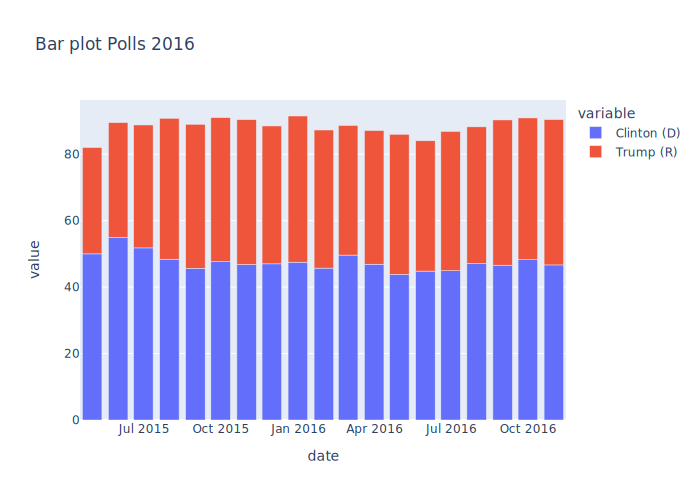

In [13]:
import plotly.express as px
fig = px.bar(temp_df, x="date", y=temp_df.columns[:2],title='Bar plot Polls 2016')
#fig.add_scatter(x=df_tab_2016['Date'], y=df_tab_2016['Trump (R)'], mode='lines')
fig.show(renderer="svg")

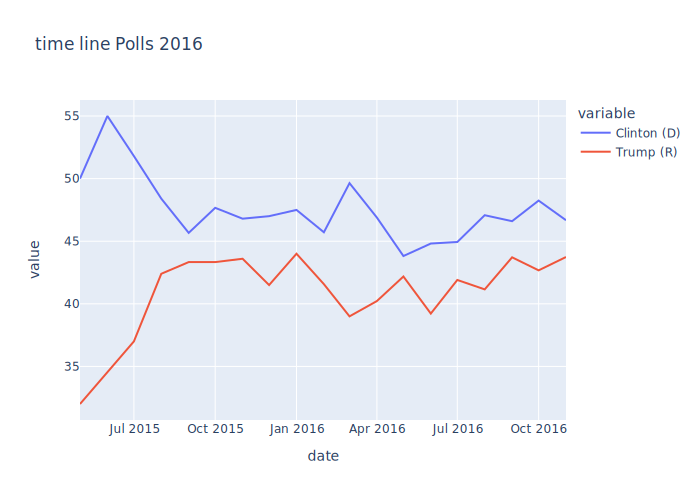

In [14]:
fig = px.line(temp_df, x="date", y=temp_df.columns[:2],title='time line Polls 2016')
#fig.add_scatter(x=df_tab_2016['Date'], y=df_tab_2016['Trump (R)'], mode='lines')
fig.show(renderer="svg")


### Polls : 2020 

### 1. Data cleaning and pre-processing

In [15]:
#seperate the year 2016 and 2015:
df_tab_2020[df_tab_2020["Date"]=='12/15 - 12/17'] #index : 231
temp1 = df_tab_2020.iloc[:231]
temp1['Date']='2020/'+temp1["Date"]
temp2 = df_tab_2020.iloc[231:]
temp2['Date']='2019/'+temp2["Date"]
df_tab_2020 = pd.concat([temp1,temp2])
df_tab_2020["Date"] = (df_tab_2020["Date"].str.split("-")).str[0]
df_tab_2020 = df_tab_2020.iloc[1:]
df_tab_2020

,Unnamed: 0,Poll,Date,Sample,MoE,Biden (D),Trump (R),Spread
1,1,RCP Average,2020/10/25,--,--,51.2,44.0,Biden +7.2
2,2,Economist/YouGovYouGov,2020/10/31,1363 LV,3.3,53.0,43.0,Biden +10
3,3,IBD/TIPP*IBD/TIPP*,2020/10/29,1212 LV,3.2,50.0,46.0,Biden +4
4,4,Reuters/IpsosReuters,2020/10/29,914 LV,3.7,52.0,45.0,Biden +7
5,5,CNBC/Change Research (D)CNBC,2020/10/29,1880 LV,2.3,52.0,42.0,Biden +10
...,...,...,...,...,...,...,...,...
290,290,PPP (D)PPP (D),2019/7/14,836 RV,3.4,54.0,39.0,Biden +15
291,291,PPP (D)PPP (D),2019/6/9,811 RV,3.4,54.0,41.0,Biden +13
292,292,PPP (D)PPP (D),2019/5/12,692 RV,3.7,54.0,40.0,Biden +14
293,293,PPP (D)PPP (D),2019/4/17,648 RV,3.9,54.0,40.0,Biden +14


### 2. Aggregating the votes monthly 

In [18]:
#aggregation by month : 
df_tab_2020["Date"] = (df_tab_2020["Date"].str.split("/")).str[0] +'/'+ (df_tab_2020["Date"].str.split("/")).str[1]
temp_df = df_tab_2020.groupby(['Date']).mean()
temp_df   = temp_df.drop(['Unnamed: 0'],axis=1)
temp_df["date"]  = temp_df.index
temp_df["date"]  = pd.to_datetime(temp_df.date)
temp_df = temp_df.sort_values("date").reset_index(drop=True)

### 3. Data visualization 

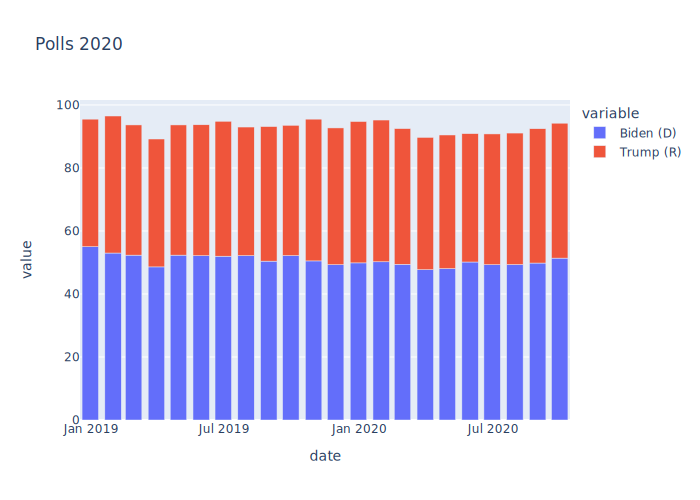

In [19]:
import plotly.express as px
fig = px.bar(temp_df, x="date", y=temp_df.columns[:2],title='Polls 2020')
#fig.add_scatter(x=df_tab_2016['Date'], y=df_tab_2016['Trump (R)'], mode='lines')
fig.show(renderer="svg")

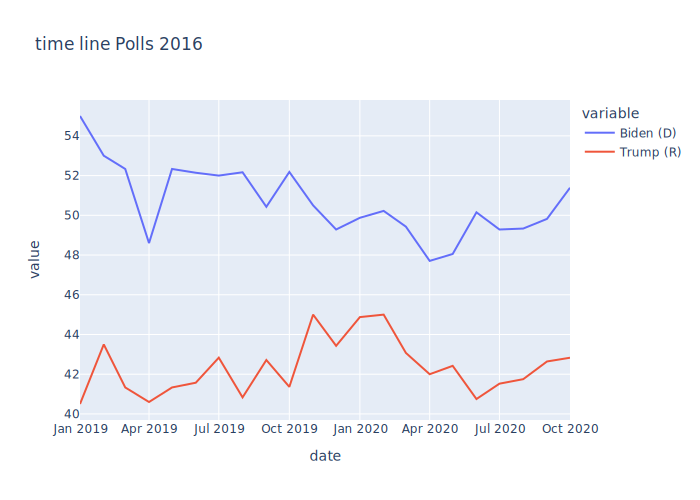

In [20]:
fig = px.line(temp_df, x="date", y=temp_df.columns[:2],title='time line Polls 2016')
#fig.add_scatter(x=df_tab_2016['Date'], y=df_tab_2016['Trump (R)'], mode='lines')
fig.show(renderer="svg")